In [543]:
%reload_ext autoreload
%autoreload 2

In [440]:
from linescanning import utils,prf,glm
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import nideconv as nd
from prfpy.stimulus import PRFStimulus2D
import os
opj = os.path.join

warnings.simplefilter('ignore')
base, place = utils.get_base_dir()

base_dir = os.path.join(base, 'projects', 'hemifield')

plot_vox = 359

In [465]:
# # Load data
# sub         = '003'
# ses         = 3
# task        = "task-SR"
# run         = [1,2]

# df_func = []
# df_onsets = []
# df_physio = []
# for ix,rr in enumerate(run):
#     func_file   = opj(base_dir, f"sub-{sub}", f"ses-{ses}", "func", f"sub-{sub}_ses-{ses}_{task}_run-{rr}_bold.mat")
#     exp_file    = opj(os.path.dirname(func_file), f"sub-{sub}_ses-{ses}_{task}_run-{rr}_events.tsv")
#     physio_file = opj(os.path.dirname(func_file), f"sub-{sub}_ses-{ses}_{task}_run-{rr}_physio.txt")
#     physio_mat  = opj(os.path.dirname(func_file), f"sub-{sub}_ses-{ses}_{task}_run-{rr}_physio.mat")

#     bp_type = "rolling"
#     window = 20
#     func = utils.ParseFuncFile(func_file, 
#                             subject=1, 
#                             run=rr, 
#                             deleted_first_timepoints=200, 
#                             deleted_last_timepoints=200,
#                             bp_filter=bp_type,
#                             window_size=window)
                            
#     onset = utils.ParseExpToolsFile(exp_file,
#                                     subject=func.subject,
#                                     run=func.run,
#                                     delete_vols=(func.deleted_first_timepoints),
#                                     TR=func.TR)         

#     physio = utils.ParsePhysioFile(physio_file,
#                                 physio_mat=physio_mat,
#                                 subject=func.subject,
#                                 run=func.run,
#                                 TR=func.TR,
#                                 deleted_first_timepoints=func.deleted_first_timepoints,
#                                 deleted_last_timepoints=func.deleted_last_timepoints)

#     # Fetch dataframes
#     onset_df    = onset.get_onset_df(index=False)
#     physio_df   = physio.get_physio(index=False)
#     raw         = func.get_raw(index=False)
#     filtered    = func.dct_psc_rol.reset_index()

#     df_func.append(filtered)
#     df_onsets.append(onset_df)
#     df_physio.append(physio_df)

# df_func = pd.concat(df_func).set_index(['subject', 'run', 't'])
# df_onsets = pd.concat(df_onsets).set_index(['subject', 'run', 'event_type'])
# df_physio = pd.concat(df_physio).set_index(['subject', 'run', 't'])


In [544]:
# Load data
sub         = '003'
ses         = 3
task        = "task-SR"
run         = 2

func_file   = opj(base_dir, f"sub-{sub}", f"ses-{ses}", "func", f"sub-{sub}_ses-{ses}_{task}_run-{run}_bold.mat")
exp_file    = opj(os.path.dirname(func_file), f"sub-{sub}_ses-{ses}_{task}_run-{run}_events.tsv")
physio_file = opj(os.path.dirname(func_file), f"sub-{sub}_ses-{ses}_{task}_run-{run}_physio.txt")
physio_mat  = opj(os.path.dirname(func_file), f"sub-{sub}_ses-{ses}_{task}_run-{run}_physio.mat")

bp_type = "rolling"
window = None
func = utils.ParseFuncFile(func_file, 
                           subject=1, 
                           run=1, 
                           deleted_first_timepoints=200, 
                           deleted_last_timepoints=200,
                           bp_filter=bp_type,
                           window_size=window)
                           
onset = utils.ParseExpToolsFile(exp_file,
                                subject=func.subject,
                                run=func.run,
                                delete_vols=(func.deleted_first_timepoints),
                                TR=func.TR)         

physio = utils.ParsePhysioFile(physio_file,
                               physio_mat=physio_mat,
                               subject=func.subject,
                               run=func.run,
                               TR=func.TR,
                               deleted_first_timepoints=func.deleted_first_timepoints,
                               deleted_last_timepoints=func.deleted_last_timepoints)

# Fetch dataframes
onset_df    = onset.get_onset_df(index=True)
physio_df   = physio.get_physio(index=True)
raw         = func.get_raw(index=True)
filtered    = func.dct_psc_rol

# beginning of window = NaN
print(f"Func data has shape {filtered.shape}")
print(f"Physio has shape    {physio_df.shape}")
filtered.head(30)

Func data has shape (11200, 720)
Physio has shape    (11200, 7)


vox 0       vox 1       vox 2       vox 3       vox 4  \
subject run t                                                                   
1       1   0.000   59.834934   40.555305  -12.924619   35.974106   -3.501809   
            0.105  -40.796951  -14.565441  103.573120   82.150650   -5.923036   
            0.210   -5.973358   18.925871   -0.370250  103.422485   30.762831   
            0.315  -24.090872  -46.457569   15.226184   71.252731  -14.346918   
            0.420  -92.210304  -49.919300   15.926601  -58.702351  -81.856682   
            0.525   29.251951  -60.052162   18.075802   26.512981  -59.622746   
            0.630  -14.924352   40.542473   47.613537  -15.927611  -58.291416   
            0.735  -37.548698   15.789773  -11.223015  -48.852592  -78.807388   
            0.840  -30.812241   -8.683595   59.679306  -38.373001  -23.584641   
            0.945   -9.709702  -45.089226   73.570450   -7.413873    2.682036   
            1.050  -83.224716   11.078067  -35.982086   13.746460   22.774298   
            1.155  103.507301  103.038147  -90.763977  -49.571152  -29.129160   
            1.260   33.837204    7.894269  -21.721590  -20.134209   39.172359   
            1.365    8.052126   -2.011101   -5.511182   14.758335  -35.995720   
            1.470  -13.712166  -64.721489  -49.681416  -36.069435  -22.197365   
            1.575  -31.668619  -37.005165  -31.247488    1.402779  -38.325691   
            1.680   70.841721   28.403061   55.523361  -84.928284    9.500182   
            1.785   16.299952   84.376762  -20.507330   21.803118   48.280487   
            1.890   93.824539  -11.305642  -28.722073   51.313992  -24.187197   
            1.995   41.109024   41.079514   77.136139  -70.598778  115.639984   
            2.100   27.983194  -19.428158  -44.443539   78.930260  120.824646   
            2.205  -11.081428   57.301964  -52.652843   28.426662   29.507446   
            2.310  -29.850262  -71.524521   32.234951  -10.550367  -30.395710   
            2.415   82.158401   22.861767  -74.221405   -6.799255   20.872202   
            2.520   87.748810  -20.592039   80.369530  -47.794380  -25.075838   
            2.625  -59.184574    2.764113   43.141933  -85.775421   16.268053   
            2.730  -65.613533  -73.741730   80.693863   43.889351  140.558228   
            2.835  -55.666924   48.990868  -31.342846  -37.072552  -40.544762   
            2.940  -17.542048   38.858055    6.373050  -93.717491   22.843279   
            3.045  -26.277866   87.359932  -27.956036   29.299393  -50.998898   

                        vox 5       vox 6       vox 7       vox 8       vox 9  \
subject run t                                                                   
1       1   0.000  -20.548988   -6.791417   45.059643   41.673916   48.836018   
            0.105   38.175591   -0.643449   78.233406   40.178555  -13.003376   
            0.210   95.342346  -45.684509   75.215385  -34.806908  -80.586479   
            0.315   77.360062  159.210281   -8.557151  136.717300  -58.553375   
            0.420   17.747255  -38.745560  -26.298401   32.592716  -96.212540   
            0.525   29.061226  -34.759598  -27.226257   15.382102   61.351734   
            0.630  -43.727413  -25.970676   62.538971  -22.076151   13.176716   
            0.735  -15.957999   46.638981   13.100269  -88.750366   71.239098   
            0.840  -31.607893   -3.561054  -95.331345  -49.630234   56.259136   
            0.945   66.290520   28.198273  -62.076569  -87.623726   29.363930   
            1.050  -48.897110   11.612609  -20.161694  -13.662547  -68.897598   
            1.155  145.491714  -66.712234  -22.315117  131.430679  -86.184753   
            1.260  -38.771881   -3.178499  -31.321404  -65.184280  -43.433849   
            1.365  -31.309784   51.131313  -59.491611  -55.699043   -2.712367   
            1.470   -1.997940  -73.041779   11.925998   39.212082    3.173318   
            1.575  -52.897133  -82.549568   30.480379 

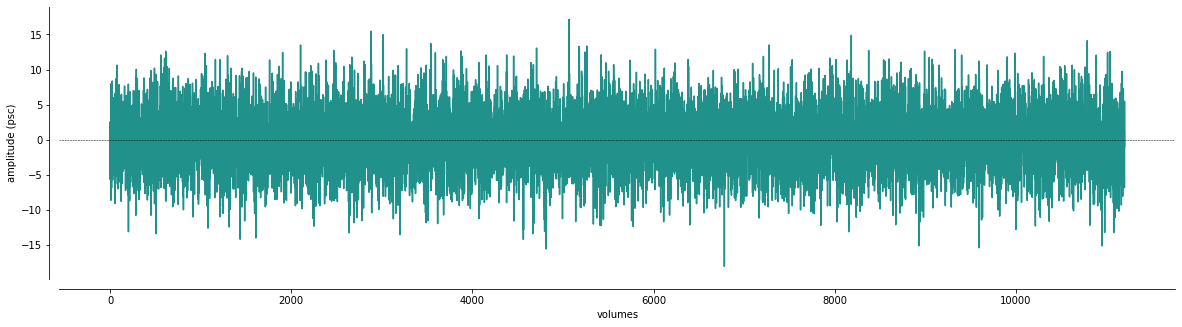

In [545]:
glm.plot_array(filtered['vox 359'].values, 
               figsize=(20,5),
               x_label="volumes",
               y_label="amplitude (psc)",
               add_hline={'pos': 0, 'ls': '--', 'color': 'k', 'lw': 0.5})


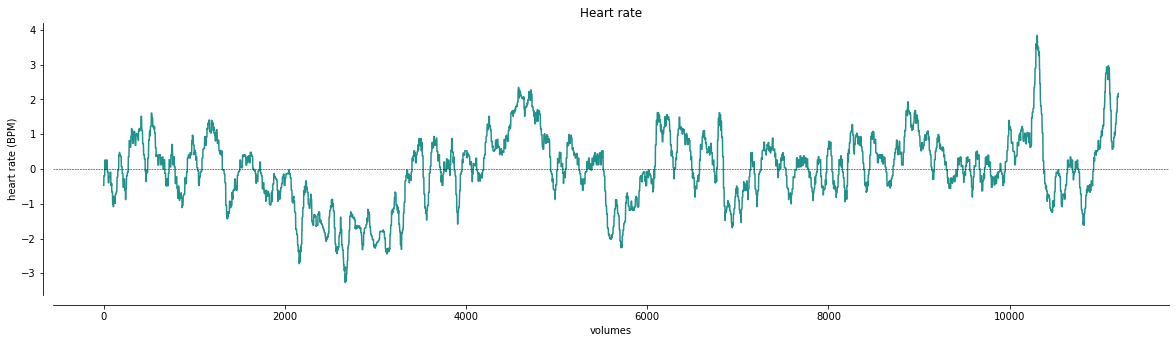

Mean heart rate = 0.0


In [546]:
glm.plot_array(physio_df['hr'].values, 
               figsize=(20,5),
               x_label="volumes",
               y_label="heart rate (BPM)",
               title=f"Heart rate",
               add_hline={'pos': physio_df['hr'].values.mean(), 'ls': '--', 'color': 'k', 'lw': 0.5})

print(f"Mean heart rate = {round(physio_df['hr'].values.mean(),2)}")

In [539]:
physio_df

,run,subject,c_0,c_1,r_0,r_1,cr_0,cr_1,hr
t,,,,,,,,,
0.000,1,1,0.119598,-0.992822,-0.971393,-0.237479,0.999999,-0.001211,59.138271
0.105,1,1,0.697258,-0.716820,-0.027662,-0.999617,0.999998,-0.002072,59.138271
0.210,1,1,0.987252,-0.159166,0.949332,-0.314275,0.000000,0.000000,59.574468
0.315,1,1,0.863817,0.503806,0.492360,0.870392,0.999999,0.001211,59.574468
0.420,1,1,0.348902,0.937159,-0.756535,0.653953,1.000000,0.000224,59.574468
...,...,...,...,...,...,...,...,...,...
1175.475,1,1,0.995716,-0.092462,0.982902,-0.184132,0.535803,-0.844343,63.091483
1175.580,1,1,0.816802,0.576918,0.334332,0.942455,0.697493,-0.716592,63.091483
1175.685,1,1,0.257743,0.966214,-0.867137,0.498069,0.797002,-0.603977,63.272070


In [136]:
# oversample with factor 1000 to get rid of 3 decimals in onset times
osf = 1000

# make stimulus vectors
stims = glm.make_stimulus_vector(onset_df, scan_length=filtered.shape[0], osf=osf, type='event')
dvas = list(stims.keys())

In [113]:
# Get size response curve from actually targeted pRF
params_actual = np.array([1.899, -2.466, 0.55, 14.473, 0, 3.324, 0.767, 0.001, 0.001, 0.503])
params_intended = np.array([0.742, -2.283, 0.439, 0.56, 0.053, 0.01, 5, 55.982, 100, 0.794])

In [ ]:
# get the design
log_dir = opj(os.path.dirname(func_file))
n_pix = 270
design_matrix = create_line_prf_matrix(log_dir, stim_duration=0.315, n_pix=n_pix, delete_vols=0, TR=func.TR)

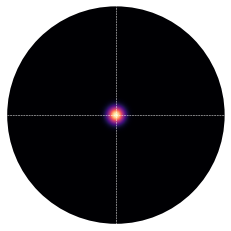

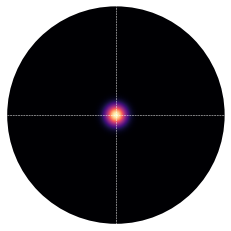

In [126]:
# get the pRF
vf_extent = [-5, 5]
prf_stim = PRFStimulus2D(screen_size_cm=70, screen_distance_cm=235, design_matrix=design_matrix, TR=func.TR)
prf_actual = prf.make_prf(prf_stim, size=params_actual[2]) #, mu_x=params_actual[0], mu_y=params_actual[1])
prf_intended = prf.make_prf(prf_stim, size=params_intended[2]) #, mu_x=params_intended[0], mu_y=params_intended[1])

# plot
prf.plot_prf(prf_intended, vf_extent)
prf.plot_prf(prf_actual, vf_extent)

A_actual = params_actual[3]
B_actual = params_actual[-3]/params_actual[3]
C_actual = params_actual[5]
D_actual = params_actual[-2]
ss_actual = params_actual[6]

A_intended = params_intended[3]
B_intended = params_intended[-3]/params_intended[3]
C_intended = params_intended[5]
D_intended = params_intended[-2]
ss_intended = params_intended[6]


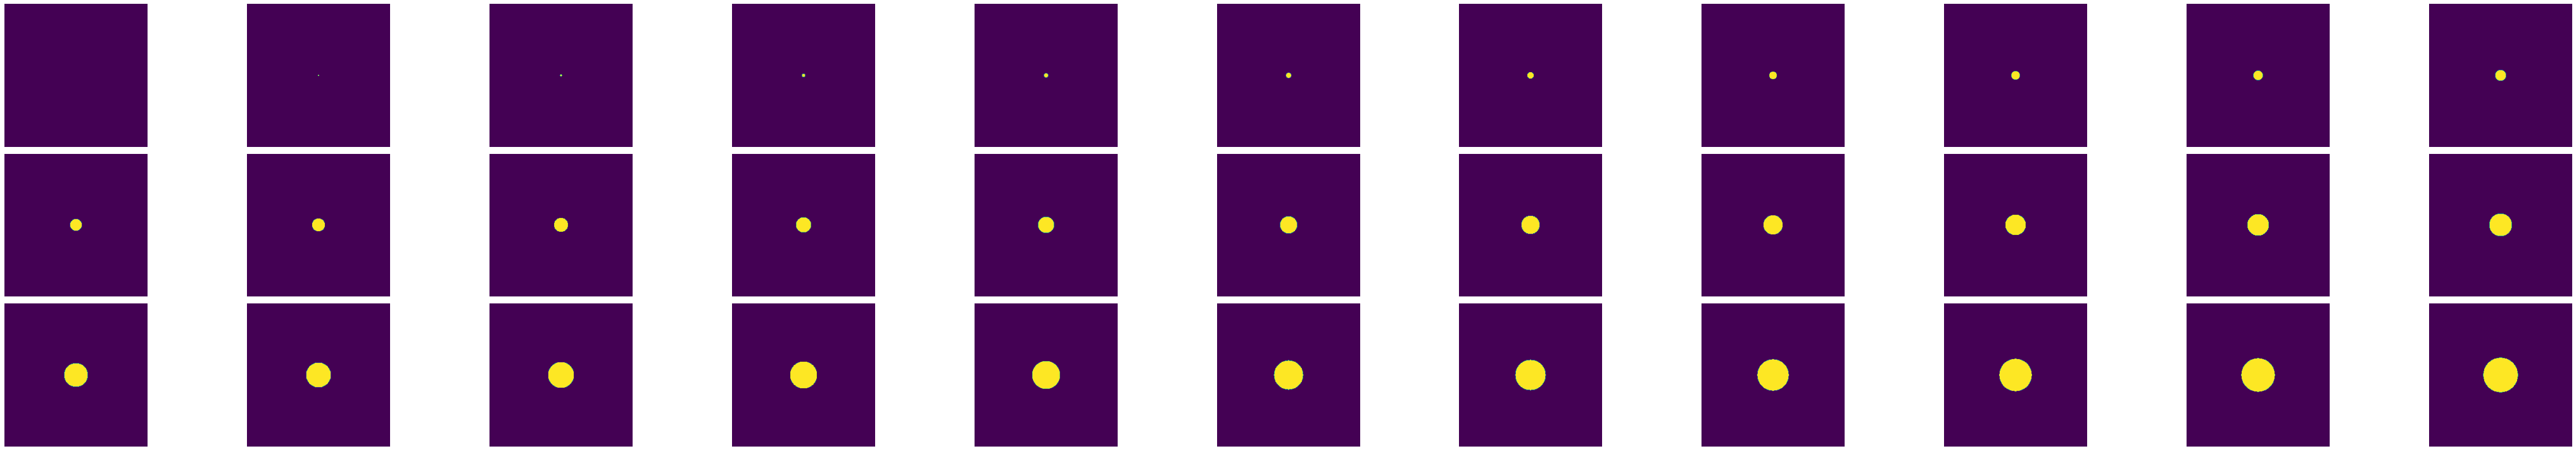

In [103]:
# create filled stimuli
stims_fill, stims_fill_sizes = prf.make_stims(n_pix, prf_stim, factr=4)
prf.plot_stims(stims_fill)

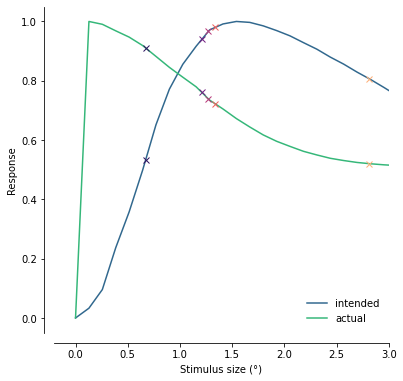

In [223]:
# define visual field
ss_deg = 3.0 * np.degrees(np.arctan(prf_stim.screen_size_cm /(2.0*prf_stim.screen_distance_cm)))
x = np.linspace(-ss_deg/2, ss_deg/2, n_pix)

# make s-r curve
srf_actual = prf.norm_2d_sr_function(A_actual, B_actual, C_actual, D_actual, params_actual[2], ss_actual, x, x, stims_fill, mu_x=0, mu_y=0)
srf_actual /= srf_actual.max()
srf_intended = prf.norm_2d_sr_function(A_intended, B_intended, C_intended, D_intended, params_intended[2], ss_intended, x, x, stims_fill, mu_x=0, mu_y=0)
srf_intended /= srf_intended.max()

colors = sns.color_palette('viridis', 2)
color_mark = sns.color_palette('magma', len(dvas))
# plot it
fig,axs = plt.subplots(figsize=(6,6))
axs.plot(stims_fill_sizes, srf_intended, color=colors[0], label='intended')
axs.plot(stims_fill_sizes, srf_actual, color=colors[1], label='actual')

# interpolate SRFs to get the amplitude at a given stimulus size
sizes_rs = glm.resample_stim_vector(stims_fill_sizes, 1000, interpolate='linear')
srf_intended_rs = glm.resample_stim_vector(srf_intended, 1000, interpolate='linear')
srf_actual_rs = glm.resample_stim_vector(srf_actual, 1000, interpolate='linear')

# plot markers at the amplitude of the selected stimulus sizes
amplitudes_actual = []
for ix, ii in enumerate(dvas):
    
    # find the index of the stimulus size in resampled stim_sizes
    idx = utils.find_nearest(sizes_rs,float(dvas[ix]))[0]

    # find value of that index in resampled SRFs
    ampl_at_stimsize_actual = srf_actual_rs[idx]
    ampl_at_stimsize_intended = srf_intended_rs[idx]
    amplitudes_actual.append(ampl_at_stimsize_actual)

    # plot
    axs.plot(float(dvas[ix]), ampl_at_stimsize_actual, color=color_mark[ix], marker='x')
    axs.plot(float(dvas[ix]), ampl_at_stimsize_intended, color=color_mark[ix], marker='x')

axs.set_ylabel("Response")
axs.set_xlabel("Stimulus size (°)")
axs.set_xlim(right=3)
axs.legend(frameon=False)
sns.despine(offset=10)

In [468]:
amplitudes_actual

[0.9108985793102151,
 0.7610213724168281,
 0.7389110927686786,
 0.721730507617845,
 0.5205168520592598]

Only found 1 peak of maximum difference; appending stim size of 3 dva
use following stimulus sizes: [0.9, 1.54, 1.74, 1.93, 3]


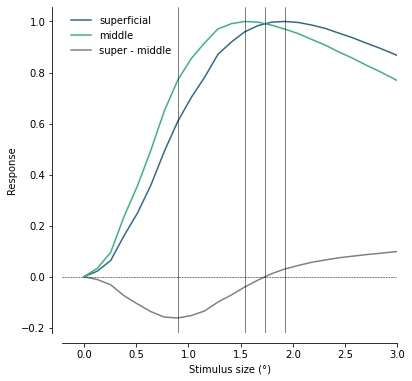

In [470]:
# compare S-R curves when pRF size differs (as is supposed to happen across laminae)
from scipy.signal import find_peaks

# 1. Obtained pRF is pooled variance across layers, so middle layer is X% smaller
prf_size_L4 = params_actual[2]*0.8

mean_srf_sup = prf.norm_2d_sr_function(A_intended, B_intended, C_intended, D_intended, params_actual[2], ss_intended, x, x, stims_fill, mu_x=0, mu_y=0)
mean_srf_sup /= mean_srf_sup.max()

mean_srf_middle = prf.norm_2d_sr_function(A_intended, B_intended, C_intended, D_intended, prf_size_L4, ss_intended, x, x, stims_fill, mu_x=0, mu_y=0)
mean_srf_middle /= mean_srf_middle.max()

# find peaks and max differences
sr_diff = mean_srf_sup-mean_srf_middle
choose_sizes = find_peaks(abs(sr_diff))[0]
choose_sizes = np.append(choose_sizes, 
                         np.array((
                             np.where(mean_srf_sup == np.amax(mean_srf_sup))[0][0],
                             np.where(mean_srf_middle == np.amax(mean_srf_middle))[0][0])))

# # find intersection
from shapely.geometry import LineString

first_line = LineString(np.column_stack((stims_fill_sizes, mean_srf_sup)))
second_line = LineString(np.column_stack((stims_fill_sizes, mean_srf_middle)))
intersection = first_line.intersection(second_line)

x_size, y_size = LineString(intersection).xy[0]

# visualize
colors = sns.color_palette('viridis', 2)
fig = plt.figure(figsize=(6,6))
plt.plot(stims_fill_sizes, mean_srf_sup, color=colors[0], label='superficial')
plt.plot(stims_fill_sizes, mean_srf_middle, color=colors[1], label='middle')
plt.plot(stims_fill_sizes, sr_diff, color=(128/255, 128/255, 128/255), label='super - middle')
plt.axhline(0, color='k', lw=0.5, ls='--')
# plt.title("Concentric stimuli drop quicker than filled")
plt.ylabel("Response")
plt.xlabel("Stimulus size (°)")
plt.xlim(right=3)
plt.legend(frameon=False)
sns.despine(offset=10)

use_stim_sizes = []
for ii in choose_sizes:
    plt.axvline(stims_fill_sizes[ii], color='k', lw=0.5)
    use_stim_sizes.append(stims_fill_sizes[ii])

# plot intersection
plt.axvline(y_size, color='k', lw=0.5)
use_stim_sizes.append(y_size)

use_stim_sizes.sort()
use_stim_sizes = [round(ii,2) for ii in use_stim_sizes]

if len(use_stim_sizes) < 5:
    print("Only found 1 peak of maximum difference; appending stim size of 3 dva")
    use_stim_sizes.append(3)

print(f"use following stimulus sizes: {use_stim_sizes}")

plt.savefig(opj(base_dir, 'code', 'figures', 'sub-003_desc-SR_curve.svg'), transparant=True)

---
# Combined GLM

In [372]:
scan_length = filtered.shape[0] * func.TR
print(f"scan length = {scan_length}s")

scan length = 1176.0s


In [373]:
stims = glm.make_stimulus_vector(onset_df, scan_length=filtered.shape[0], osf=osf, amplitude=amplitudes_actual)

# create one stimulus vector with all events and amplitudes of newly calculated SRF
super_stim_vector = np.zeros_like(stims['0.67'])
for ix,ii in enumerate(stims):
    idc = np.where(stims[ii] == np.amax(stims[ii]))

    super_stim_vector[idc] = amplitudes_actual[ix]

ValueError: Nr of amplitudes (5) does not match number of conditions (6)

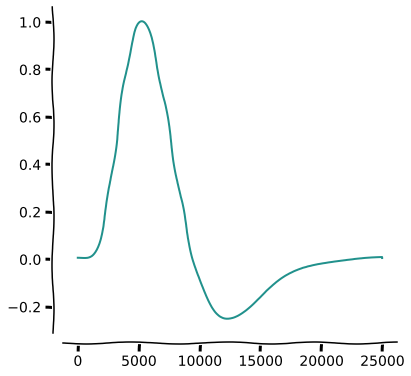

In [257]:
# define HRF
dt = 1/osf
time_points = np.linspace(0,25,np.rint(float(25)/dt).astype(int))
canonical_hrf = glm.double_gamma(time_points, lag=6)

glm.plot_array(canonical_hrf, xkcd=True, figsize=(6,6))

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


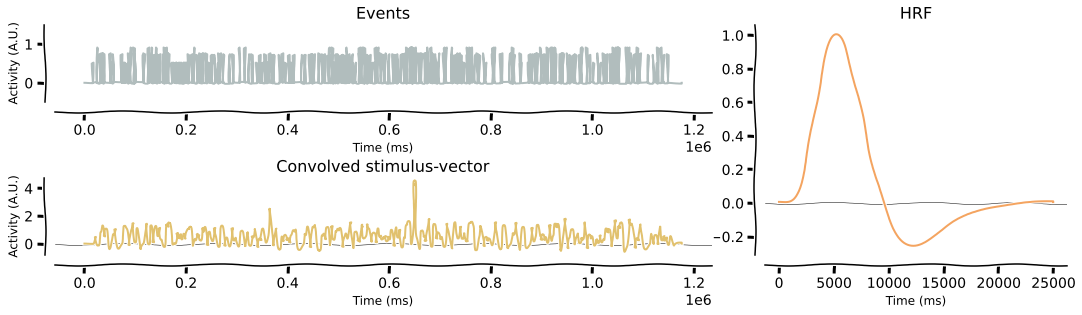

In [258]:
convolved_stim_vector = glm.convolve_hrf(canonical_hrf, super_stim_vector, make_figure=True, xkcd=True)


(11200,)


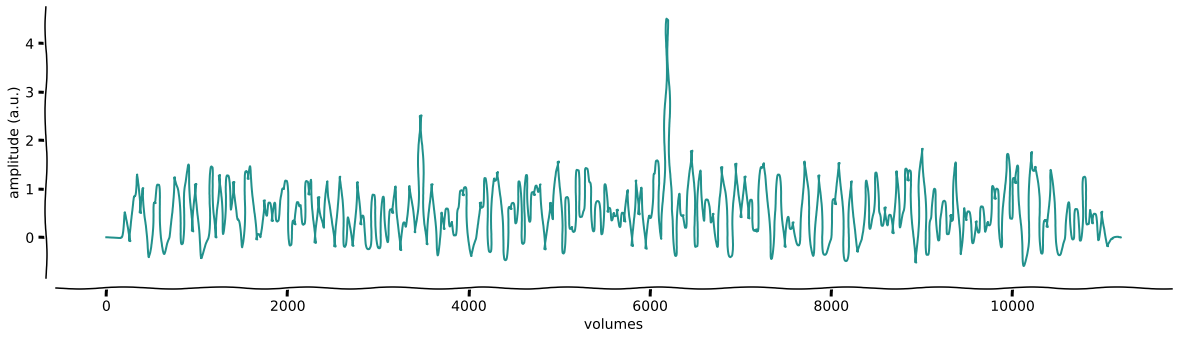

In [264]:
# resample to original timescale
convolved_stim_vector_ds = glm.resample_stim_vector(convolved_stim_vector, raw.shape[0])
print(convolved_stim_vector_ds.shape)

glm.plot_array(convolved_stim_vector_ds, figsize=(20,5), x_label="volumes", y_label="amplitude (a.u.)", xkcd=True)

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


max tstat (vox 359) = 7.32
max beta (vox 359) = 0.06


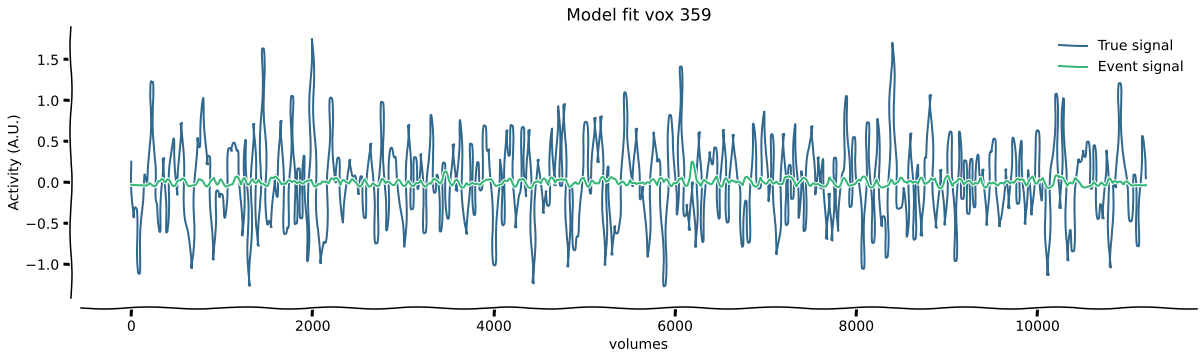

In [301]:
betas,x_conv = glm.fit_first_level(convolved_stim_vector_ds, filtered.values, make_figure=True, xkcd=True, plot_vox=359)

---
# Deconvolution

In [547]:
print(filtered.shape)
print(physio_df.shape)

(11200, 720)
(11200, 7)


In [554]:
min_int = 0
max_int = 18
n_regres = 11
fs = 1/func.TR

g_model = nd.GroupResponseFitter(filtered,
                                 onset_df,
                                 input_sample_rate=fs,
                                 concatenate_runs=False,
                                 confounds=physio_df, 
                                 add_intercept=False)

cond = onset_df.reset_index().event_type.unique()
cond = np.array(sorted([i for i in cond if i != 'nan']))
print(f"Conditions are: {cond}")
[g_model.add_event(str(i),
                  basis_set='fourier',
                  n_regressors=n_regres,
                  interval=[min_int,max_int]) for i in cond]
           
# g_model.add_event(str(cond[-1]), basis_set='fir', n_regressors=None, interval=[min_int,max_int])
g_model.fit()
print("Done")

Conditions are: ['0.77' '1.28' '1.59' '1.93' '3.0']
Done


In [555]:
cols = sns.color_palette('viridis', len(cond))
tmp = g_model.get_subjectwise_timecourses().reset_index()
tmp

,subject,event type,covariate,time,vox 0,vox 1,vox 2,vox 3,vox 4,vox 5,...,vox 710,vox 711,vox 712,vox 713,vox 714,vox 715,vox 716,vox 717,vox 718,vox 719
0,1,0.77,intercept,0.000000,-1.657638,1.507905,0.379258,4.385608,0.121276,-2.234430,...,0.286515,-0.825083,2.849415,-1.565790,1.681746,0.013166,2.933329,-2.028913,0.326381,-2.831675
1,1,0.77,intercept,0.005252,-1.683885,1.521321,0.420225,4.409177,0.135338,-2.229368,...,0.307660,-0.825329,2.844592,-1.577751,1.694352,0.001443,2.917751,-2.035152,0.322026,-2.832810
2,1,0.77,intercept,0.010503,-1.710192,1.534643,0.461174,4.432621,0.149429,-2.224244,...,0.328824,-0.825635,2.839710,-1.589634,1.706933,-0.010182,2.902037,-2.041334,0.317646,-2.833802
3,1,0.77,intercept,0.015755,-1.736557,1.547870,0.502105,4.455939,0.163547,-2.219058,...,0.350004,-0.826003,2.834769,-1.601439,1.719487,-0.021710,2.886187,-2.047458,0.313243,-2.834651
4,1,0.77,intercept,0.021006,-1.762978,1.561002,0.543014,4.479130,0.177692,-2.213812,...,0.371199,-0.826433,2.829770,-1.613165,1.732014,-0.033139,2.870202,-2.053524,0.308817,-2.835357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17090,1,3.0,intercept,17.928742,1.556603,-1.426005,1.402496,0.826003,-2.178184,0.437652,...,-1.145171,-0.451351,-0.656808,0.504781,-2.857470,-2.385983,-1.523217,0.140484,-0.964858,0.692480
17091,1,3.0,intercept,17.933994,1.558003,-1.411290,1.421622,0.818009,-2.178849,0.450806,...,-1.139424,-0.449468,-0.630080,0.492277,-2.883708,-2.364136,-1.515006,0.143883,-0.984350,0.702973
17092,1,3.0,intercept,17.939245,1.559322,-1.396502,1.440784,0.810012,-2.179410,0.464007,...,-1.133758,-0.447621,-0.603314,0.479828,-2.909912,-2.342279,-1.506812,0.147372,-1.003816,0.713564
17093,1,3.0,intercept,17.944497,1.560557,-1.381641,1.459981,0.802012,-2.179869,0.477255,...,-1.128172,-0.445811,-0.576513,0.467432,-2.936080,-2.320414,-1.498636,0.150949,-1.023253,0.724252


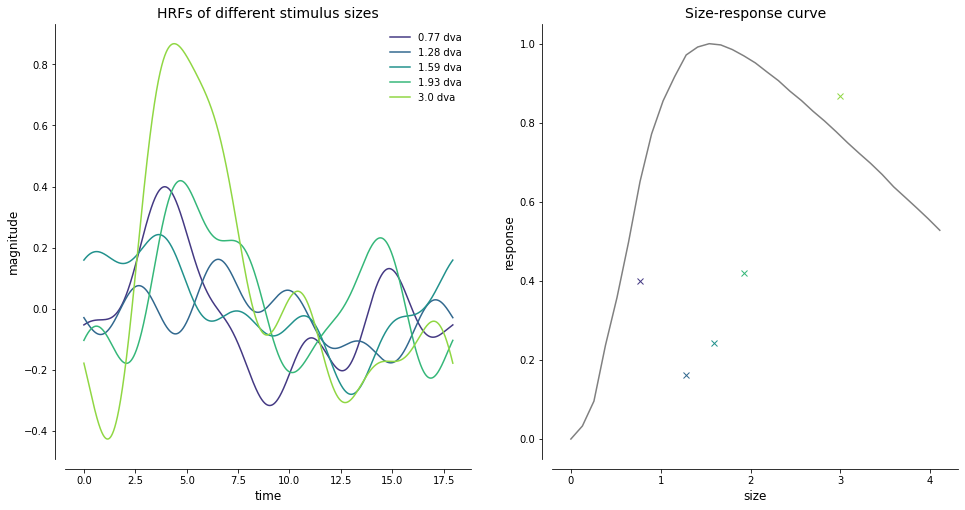

In [556]:
fig,axs = plt.subplots(1,2, figsize=(16,8))
max_vals = []
for idc,ii in enumerate(cond):

    jj = tmp[(tmp['event type'] == str(ii))]['vox 362'].values
    xx = tmp[(tmp['event type'] == str(ii))]['time'].values

    axs[0].plot(xx,jj, color=cols[idc], label=f"{str(ii)} dva")
    sns.despine(offset=10)
    max_vals.append(np.amax(jj))
    
max_vals = np.array(max_vals)
    
axs[0].set_xlabel('time').set_fontsize(12)
axs[0].set_ylabel('magnitude').set_fontsize(12)
axs[0].legend(frameon=False)
axs[0].set_title('HRFs of different stimulus sizes').set_fontsize(14)
axs[1].plot(stims_fill_sizes, srf_intended, color=(128/255, 128/255, 128/255))
for ix,kk in enumerate(max_vals):
    axs[1].plot(cond.astype(float)[ix], kk, color=cols[ix], marker='x')    
axs[1].set_title('Size-response curve').set_fontsize(14)
axs[1].set_xlabel('size').set_fontsize(12)
axs[1].set_ylabel('response').set_fontsize(12)
plt.show()

In [584]:
ribbon = [356,364]

In [585]:
avg_sizes = []
for sizes in cond:
    avg = []
    for ii in range(*ribbon):
        
        tc = tmp[(tmp['event type'] == str(sizes))][f'vox {ii}'].values
        tc = np.array(tc)
        avg.append(tc)
    avg = np.array(avg)
    tc_mean = avg.mean(axis=0)
    avg_sizes.append(tc_mean)

avg_sizes = np.array(avg_sizes)
avg_sizes.shape

(5, 3419)

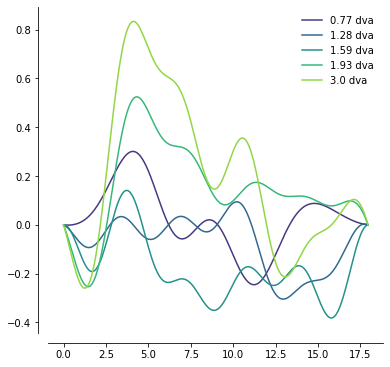

In [586]:
fig, axs = plt.subplots(figsize=(6,6))

colors = sns.color_palette('viridis', avg_sizes.shape[0])
for ii in range(avg_sizes.shape[0]):
    axs.plot(xx,avg_sizes[ii,...]-avg_sizes[ii,0], color=colors[ii], label=f"{cond[ii]} dva")

plt.legend(frameon=False)
sns.despine(offset=10)

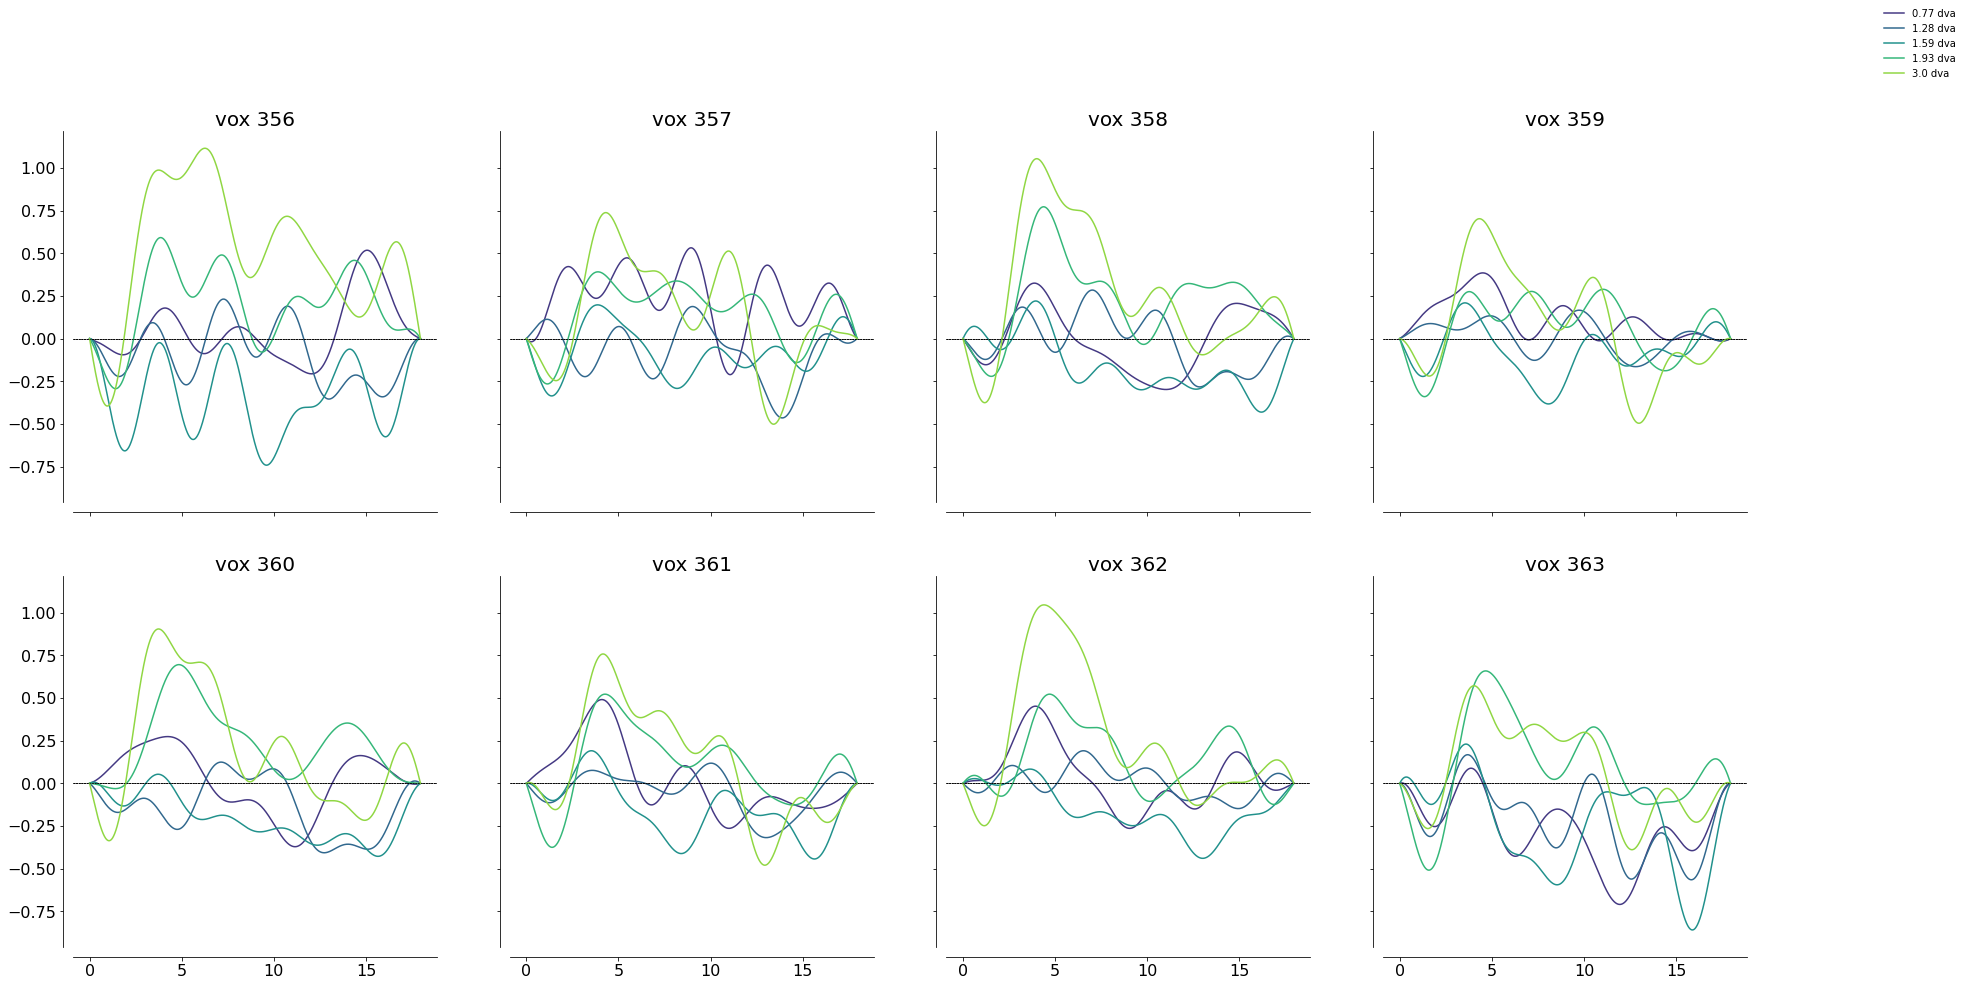

In [595]:
vox = np.arange(*ribbon)
fig, axs = plt.subplots(2, len(vox)//2, figsize=(30,15), sharex=True, sharey=True)

for i, ax in enumerate(fig.axes):
    
    for idc,ii in enumerate(cond):

        jj = tmp[(tmp['event type'] == str(ii))][f'vox {vox[i]}'].values
        xx = tmp[(tmp['event type'] == str(ii))]['time'].values

        ax.plot(xx,jj-jj[0], color=cols[idc], label=f"{str(ii)} dva")
        ax.set_title(f"vox {vox[i]}").set_fontsize(20)
        ax.axhline(0, ls='--', color='k', lw=0.5)
        ax.tick_params(axis='both', which='major', labelsize=16)
    sns.despine(offset=10)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='best', frameon=False)    